<a href="https://colab.research.google.com/github/kasier48/DeepLearning/blob/main/Week3/Pratice_Week_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tqdm boto3 requests regex sentencepiece sacremoses datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This 

In [2]:
import torch
from datasets import load_dataset
from torch.utils.data import DataLoader

tokenizer = torch.hub.load('huggingface/pytorch-transformers', 'tokenizer', 'distilbert-base-uncased')

ds = load_dataset("glue", "mnli")
train_dataset = ds['train']

# [MYCODE] train 데이터 확인
print(f"Train 데이터 확인: {train_dataset[0]}")

# [MYCODE] 라벨의 종류 확인
label_info = train_dataset.features['label']
print(f"라벨의 종류: {label_info.names}")

# [MYCODE] 라벨의 종류 개수 설정
num_labels = len(label_info.names)

# [MYCODE] 데이터의 개수를 만개로 제한
dataset_length = 10000
train_dataset = train_dataset.select(range(dataset_length))

validation_matched_dataset = ds['validation_matched']

test_dataset = ds['test_matched']

def collate_fn(batch):
  max_len = 400
  texts, labels = [], []
  for row in batch:
    labels.append(row['label'])

    # [MYCODE] 전제와 가설 문장을 합체
    texts.append(row['premise'] + " " + row['hypothesis'])

  encoding = tokenizer(texts, padding=True, truncation=False, max_length=max_len, return_tensors="pt")
  labels = torch.LongTensor(labels)

  # [MYCODE] attention_mask도 가져오도록 수정
  return encoding.input_ids, labels, encoding.attention_mask

train_loader = DataLoader(
    train_dataset, batch_size=64, shuffle=True, collate_fn=collate_fn
)
validation_loader = DataLoader(
    validation_matched_dataset, batch_size=64, shuffle=False, collate_fn=collate_fn
)
test_loader = DataLoader(
    test_dataset, batch_size=64, shuffle=False, collate_fn=collate_fn
)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/huggingface/pytorch-transformers/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://hu

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/52.2M [00:00<?, ?B/s]

(…)alidation_matched-00000-of-00001.parquet:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

(…)dation_mismatched-00000-of-00001.parquet:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

test_matched-00000-of-00001.parquet:   0%|          | 0.00/1.22M [00:00<?, ?B/s]

test_mismatched-00000-of-00001.parquet:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/392702 [00:00<?, ? examples/s]

Generating validation_matched split:   0%|          | 0/9815 [00:00<?, ? examples/s]

Generating validation_mismatched split:   0%|          | 0/9832 [00:00<?, ? examples/s]

Generating test_matched split:   0%|          | 0/9796 [00:00<?, ? examples/s]

Generating test_mismatched split:   0%|          | 0/9847 [00:00<?, ? examples/s]

Train 데이터 확인: {'premise': 'Conceptually cream skimming has two basic dimensions - product and geography.', 'hypothesis': 'Product and geography are what make cream skimming work. ', 'label': 1, 'idx': 0}
라벨의 종류: ['entailment', 'neutral', 'contradiction']


In [5]:
device = torch.device('cuda')

def train_model(model, optimizer, n_epochs):
  loss_list = []
  train_acc_list = []
  validation_acc_list = []

  for epoch in range(n_epochs):
    total_loss = 0.
    model.train()

    for data in train_loader:
      model.zero_grad()
      inputs, labels, attention_mask = data
      inputs, labels, attention_mask = inputs.to(device), labels.to(device), attention_mask.to(device)

      # [MYCODE] padding 처리 떄문에 attention_mask도 주도록 설정
      preds = model(inputs, attention_mask)
      loss = loss_fn(preds, labels)
      loss.backward()
      optimizer.step()

      total_loss += loss.item()

    loss_list.append(total_loss)
    print(f"Epoch {epoch:3d} | Train Loss: {total_loss}")

    # [MYCODE] 매 epoch 마다 정확도 측정
    with torch.no_grad():
      model.eval()
      train_acc = accuracy(model, train_loader)
      train_acc_list.append(train_acc)

      validation_acc = accuracy(model, validation_loader)
      validation_acc_list.append(validation_acc)
      print(f"=========> Train acc: {train_acc:.3f} | Validation acc: {validation_acc:.3f}")


  return (loss_list, train_acc_list, validation_acc_list)

def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels, attention_mask = data
    inputs, labels, attention_mask = inputs.to(device), labels.to(device), attention_mask.to(device)

    preds = model(inputs, attention_mask)

    # [MYCODE] 다중 분류 이므로 가장 높은 점수로 가져옴
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

from torch import nn

# [MYCODE] Fine-tunning을 위한 모델 정의
class PreTraiendTextClassifier(nn.Module):
  def __init__(self, num_labels, dropout_rate):
    super(PreTraiendTextClassifier, self).__init__()

    self.encoder = torch.hub.load('huggingface/pytorch-transformers', 'model', 'distilbert-base-uncased')

    # [MYCODE]과적합 방지를 위해 dropout 설정
    self.dropout = nn.Dropout(dropout_rate)
    self.classifier = nn.Linear(768, num_labels)

  def forward(self, x, attention_mask):
    x = self.encoder(x, attention_mask)['last_hidden_state']

    # [MYCODE] 과적합 방지를 위해 cls에 dropout 적용
    x = self.dropout(x[:, 0])
    x = self.classifier(x)
    return x

from torch.optim import Adam
from torch.optim import AdamW
import numpy as np

fine_tunning_model = PreTraiendTextClassifier(num_labels, dropout_rate=0.1)

# [MYCODE] 정확도가 잘안오르는 문제가 있어서 learning rate과 AdamW를 사용하여 가중치 정규화 적용
lr = 1e-5
fine_tunning_model = fine_tunning_model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = AdamW(fine_tunning_model.parameters(), lr=lr, weight_decay=0.01)
n_epochs = 10

fine_tunning_result = train_model(fine_tunning_model, optimizer, n_epochs)

# =============================================================================================>

from transformers import DistilBertModel, DistilBertConfig

# [MYCODE] Non-traiend 되지 않은 모델 정의
class NonTrainedTextClassifier(nn.Module):
    def __init__(self, num_labels, config, dropout_rate):
        super(NonTrainedTextClassifier, self).__init__()

        # [MYCODE] 사전에 학습되지 않은 디폴트 DistilBert 모델 정의
        self.encoder = DistilBertModel(config)
        self.dropout = nn.Dropout(dropout_rate)
        self.classifier = nn.Linear(768, num_labels)

    def forward(self, x, attention_mask):
        x = self.encoder(x, attention_mask)['last_hidden_state']
        x = self.dropout(x[:, 0])
        x = self.classifier(x)
        return x

non_trained_config = DistilBertConfig()
non_traiend_text_classifier = NonTrainedTextClassifier(num_labels, non_trained_config, dropout_rate=0.1)
non_traiend_text_classifier = non_traiend_text_classifier.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = AdamW(fine_tunning_model.parameters(), lr=lr, weight_decay=0.01)

non_trained_result = train_model(non_traiend_text_classifier, optimizer, n_epochs)

Using cache found in /root/.cache/torch/hub/huggingface_pytorch-transformers_main


Epoch   0 | Train Loss: 159.48192656040192
=========> Train acc: 0.636 | Validation acc: 0.596
Epoch   1 | Train Loss: 124.68064504861832
=========> Train acc: 0.738 | Validation acc: 0.643
Epoch   2 | Train Loss: 103.54643043875694
=========> Train acc: 0.809 | Validation acc: 0.666
Epoch   3 | Train Loss: 83.89392349123955
=========> Train acc: 0.867 | Validation acc: 0.677
Epoch   4 | Train Loss: 67.30066594481468
=========> Train acc: 0.927 | Validation acc: 0.677
Epoch   5 | Train Loss: 51.21306996047497
=========> Train acc: 0.954 | Validation acc: 0.679
Epoch   6 | Train Loss: 38.17725498974323
=========> Train acc: 0.976 | Validation acc: 0.670
Epoch   7 | Train Loss: 27.7613974660635
=========> Train acc: 0.988 | Validation acc: 0.670
Epoch   8 | Train Loss: 19.392532248049974
=========> Train acc: 0.994 | Validation acc: 0.672
Epoch   9 | Train Loss: 13.996277140453458
=========> Train acc: 0.996 | Validation acc: 0.675
Epoch   0 | Train Loss: 182.33001518249512
=========> Tr

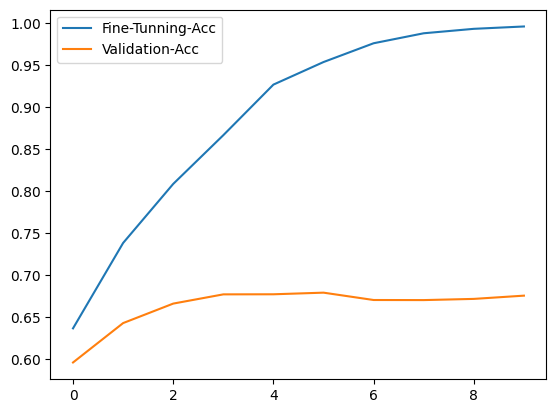

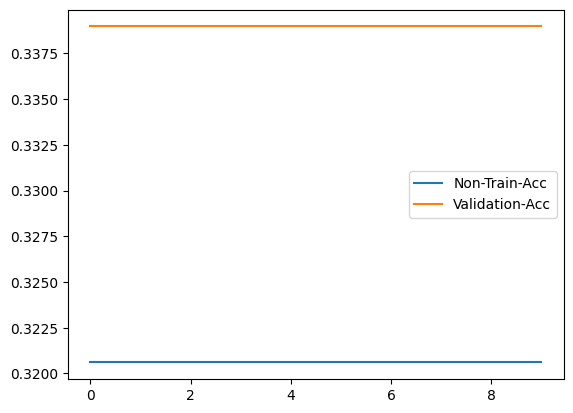

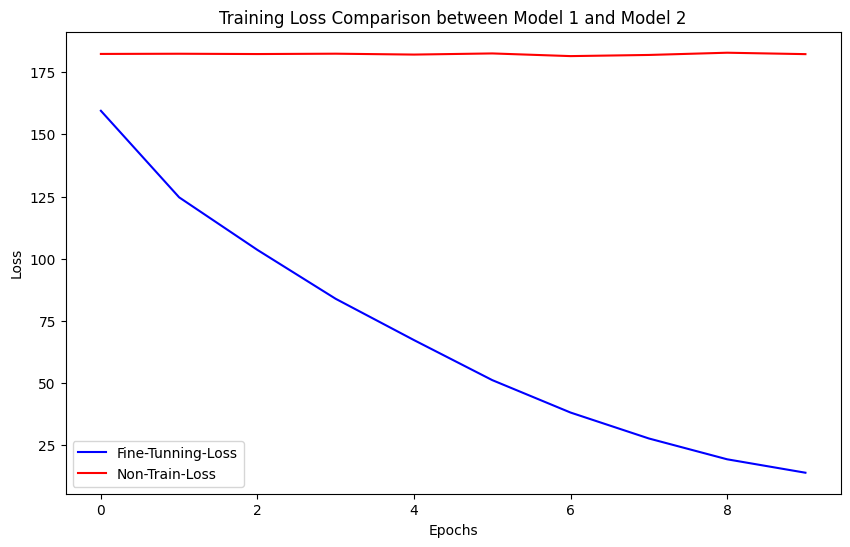

In [6]:
import matplotlib.pyplot as plt

def plot_acc(first_accs, second_accs, label1='train', label2='test'):
  x = np.arange(len(first_accs))

  plt.plot(x, first_accs, label=label1)
  plt.plot(x, second_accs, label=label2)
  plt.legend()
  plt.show()

# [MYCODE] Fine-tunning된 모델의 정확도를 측정
fine_tunning_train_acc_list = fine_tunning_result[1]
fine_tunning_validation_acc_list = fine_tunning_result[2]
plot_acc(fine_tunning_train_acc_list, fine_tunning_validation_acc_list, label1="Fine-Tunning-Acc", label2="Validation-Acc")

# [MYCODE] Non-traiend된 모델의 정확도 측정
non_trained_train_acc_list = non_trained_result[1]
non_traiend_validation_acc_list = non_trained_result[2]
plot_acc(non_trained_train_acc_list, non_traiend_validation_acc_list, label1="Non-Train-Acc", label2="Validation-Acc")

# [MYOCDE] Fine-tunning된 모델과 Non-trained된 모델의 loss 측정
def plot_loss(n_epochs, model1, model2, mode1_label, model2_label):
  # 손실 그래프 그리기
  plt.figure(figsize=(10, 6))
  plt.plot(range(n_epochs), model1, label=mode1_label, color='blue')
  plt.plot(range(n_epochs), model2, label=model2_label, color='red')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training Loss Comparison between Model 1 and Model 2')
  plt.legend()
  plt.show()

fine_tunning_loss_list = fine_tunning_result[0]
non_trained_loss_list = non_trained_result[0]
plot_loss(n_epochs, fine_tunning_loss_list, non_trained_loss_list, mode1_label="Fine-Tunning-Loss", model2_label="Non-Train-Loss")
